# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Websites: 

* Geo Coordinate System: https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm
* Starter code for Citipy: https://pypi.org/project/citipy/
* citipy documentation: https://libraries.io/pypi/citipy
* OpenWeather: https://openweathermap.org/api


    

In [1]:
# DEPENDENCIES 


# Import API Keys 
# Install citipy 

from api_keys import (weather_api_key, g_key)
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import gmaps
import time
from scipy.stats import linregress
from pprint import pprint






# Read Output File for Cities (CSV)

output_data_file  = pd.read_csv("../output_data/cities.csv")
output_data_file 



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [2]:
# Ranges: latitudes and longitudes ("Lat" & "Lng")

# NOTE, referenced ranges/coordinates info: "Geo Coordinate System"
# Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
# Longitude values are measured relative to the prime meridian. 
# They range from -180° when traveling west to 180° when traveling east. 


lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# set up lists to hold reponse info (Lats/Lng & cities)

lat_lng = []
cities = []

# retrieve random lats/Lngs coordinates
random_lats = np.random.uniform(low=-90, high=90, size=1500)
random_lngs = np.random.uniform(low=-180, high=180, size=1500)
random_lats_lngs = zip(random_lats, random_lngs)

# using citipy to look up city names w/

for lat_lng in random_lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the list of cities []
    if city not in cities:
        cities.append(city)

# city count (require min of 500)
len(cities)


580

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create API URL 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=9a1cd8f986a805de013d19b41d9ef01f&units=metric&q=


In [5]:
# use openweathermap.org (review specs- similar to what we did in class) to view API response

# create response lists corresponding to the specs
city_name = []
country_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
date = []
wind_speed = []


# loop through the  list of cities [] created above
# exception will be noted below for cities not found

# counter for the call
count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    
    # error handling to skip the error/not found cities
    try:
        #print(f"{queryUrl}{city}")
        # limit calls to 500 cities as required
        if (count > 500):
            break
        response = requests.get(f"{query_url}{city}").json()
        city_name.append(response["name"])
        country_name.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing data for {count} | {city}")
        count += 1

# due to call restrictions per certain period of time, using time.sleep() to perform the calls in batches
# wait for one second  
        time.sleep(1.00)
        
    except:
        print(f"{city} not found. Skipping... ")
        
    continue

Beginning Data Retrieval
-------------------------------
Processing data for 1 | atuona
Processing data for 2 | mehamn
Processing data for 3 | tiksi
Processing data for 4 | bethel
Processing data for 5 | vaini
Processing data for 6 | ushuaia
Processing data for 7 | monte alegre
Processing data for 8 | jamestown
Processing data for 9 | alta floresta
Processing data for 10 | irtyshskiy
Processing data for 11 | hilo
Processing data for 12 | east london
Processing data for 13 | thompson
Processing data for 14 | qaanaaq
Processing data for 15 | norman wells
Processing data for 16 | hermanus
Processing data for 17 | springbok
Processing data for 18 | carbonia
Processing data for 19 | cherskiy
Processing data for 20 | rikitea
Processing data for 21 | cape town
Processing data for 22 | tanout
Processing data for 23 | bredasdorp
Processing data for 24 | hobyo
Processing data for 25 | mayumba
Processing data for 26 | luderitz
Processing data for 27 | freeport
Processing data for 28 | sangerhause

Processing data for 211 | sibolga
Processing data for 212 | bonavista
Processing data for 213 | cidreira
Processing data for 214 | tabuk
Processing data for 215 | honningsvag
Processing data for 216 | geraldton
Processing data for 217 | boguchany
Processing data for 218 | ayan
Processing data for 219 | ossora
Processing data for 220 | zheleznodorozhnyy
Processing data for 221 | khatanga
Processing data for 222 | piacabucu
Processing data for 223 | lahaina
Processing data for 224 | kalmar
Processing data for 225 | nanortalik
Processing data for 226 | leninskoye
Processing data for 227 | praxedis guerrero
Processing data for 228 | oda
Processing data for 229 | tsovazard
Processing data for 230 | marsh harbour
Processing data for 231 | sioux lookout
Processing data for 232 | mugur-aksy
Processing data for 233 | carberry
Processing data for 234 | genhe
Processing data for 235 | pyay
Processing data for 236 | kruisfontein
Processing data for 237 | galle
Processing data for 238 | mahon
Proce

Processing data for 430 | spassk-ryazanskiy
Processing data for 431 | cotonou
Processing data for 432 | dingli
Processing data for 433 | chekhov
Processing data for 434 | gizo
Processing data for 435 | alyangula
Processing data for 436 | hervey bay
Processing data for 437 | jinxiang
Processing data for 438 | voh
Processing data for 439 | canavieiras
Processing data for 440 | san cristobal
Processing data for 441 | evensk
Processing data for 442 | petropavlovsk-kamchatskiy
Processing data for 443 | zhanaozen
Processing data for 444 | aldergrove
Processing data for 445 | caravelas
Processing data for 446 | platanos
Processing data for 447 | carman
Processing data for 448 | front royal
Processing data for 449 | faya
Processing data for 450 | konstantinovka
Processing data for 451 | colac
Processing data for 452 | pak phanang
Processing data for 453 | naryan-mar
Processing data for 454 | hambantota
Processing data for 455 | faanui
Processing data for 456 | amahai
Processing data for 457 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create df

# dictionary
data = { 
    "City": city_name,
    "Country": country_name, 
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Date": date,
    "Wind Speed": wind_speed
}

raw_data=pd.DataFrame(data)
print(raw_data.count())
raw_data


City          500
Country       500
Latitude      500
Longitude     500
Max Temp      500
Humidity      500
Cloudiness    500
Date          500
Wind Speed    500
dtype: int64


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,Atuona,PF,-9.80,-139.03,25.66,76,0,1602374840,8.78
1,Mehamn,NO,71.04,27.85,8.30,91,96,1602374841,6.52
2,Tiksi,RU,71.69,128.87,-9.79,94,55,1602374842,4.55
3,Bethel,US,41.37,-73.41,19.00,68,1,1602374690,3.10
4,Vaini,TO,-21.20,-175.20,25.00,78,40,1602374844,6.20
...,...,...,...,...,...,...,...,...,...
495,Abu Samrah,SY,35.30,37.18,18.61,30,0,1602375400,2.97
496,Brufut,GM,13.38,-16.75,26.00,94,20,1602375402,5.04
497,Pathein,MM,16.78,94.73,24.67,88,92,1602375403,3.16
498,Øksfjord,NO,70.24,22.35,8.00,93,100,1602375404,1.50


In [7]:
# Save as CSV

raw_data.to_csv("../output_data/raw_data.csv", index=False)
raw_data = pd.read_csv("../output_data/raw_data.csv")

raw_data

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,Atuona,PF,-9.80,-139.03,25.66,76,0,1602374840,8.78
1,Mehamn,NO,71.04,27.85,8.30,91,96,1602374841,6.52
2,Tiksi,RU,71.69,128.87,-9.79,94,55,1602374842,4.55
3,Bethel,US,41.37,-73.41,19.00,68,1,1602374690,3.10
4,Vaini,TO,-21.20,-175.20,25.00,78,40,1602374844,6.20
...,...,...,...,...,...,...,...,...,...
495,Abu Samrah,SY,35.30,37.18,18.61,30,0,1602375400,2.97
496,Brufut,GM,13.38,-16.75,26.00,94,20,1602375402,5.04
497,Pathein,MM,16.78,94.73,24.67,88,92,1602375403,3.16
498,Øksfjord,NO,70.24,22.35,8.00,93,100,1602375404,1.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:

# max_hum= raw_data["Humidity"].max
# max_hum

humidity_100plus= raw_data[raw_data["Humidity"]> 100]
len(humidity_100plus)

# results show that there are no cities that have humidity > 100%.

0

In [9]:
#  Get the indices of cities that have humidity over 100%.


#  ***there are no cities that have humidity > 100%.

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#  ***there are no cities that have humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

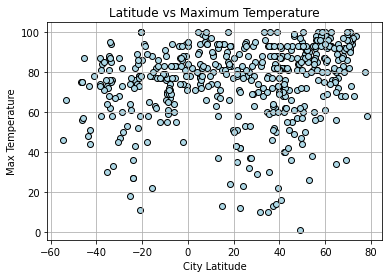

In [11]:
#  plt.scatter(x, y, s=area, c=colors, alpha=0.5)

x= raw_data["Latitude"]
y= raw_data["Humidity"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature")

plt.show()



## Latitude vs. Humidity Plot

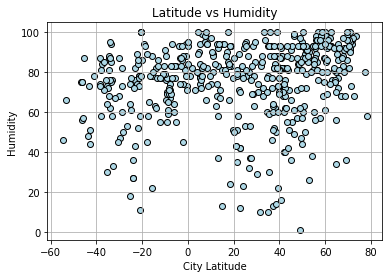

In [12]:
x= raw_data["Latitude"]
y= raw_data["Humidity"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

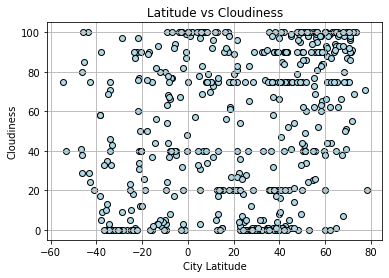

In [13]:
x= raw_data["Latitude"]
y= raw_data["Cloudiness"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

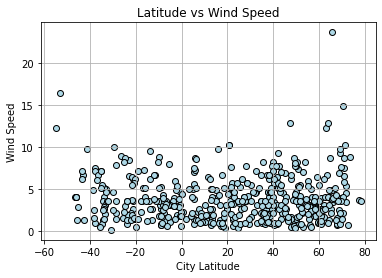

In [14]:
x= raw_data["Latitude"]
y= raw_data["Wind Speed"]

plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

plt.grid()
plt.title("Latitude vs Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")

plt.show()

## Linear Regression

In [15]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# df for north & south hemispheres for Latitude Linear Regression 

north_hemisphere= raw_data[raw_data["Latitude"]> 0]
south_hemisphere= raw_data[raw_data["Latitude"]< 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7133032539517499


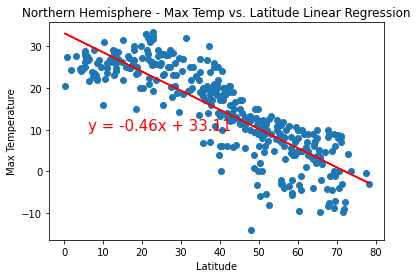

In [16]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.518924680563663


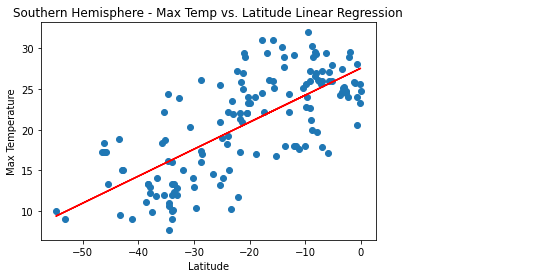

In [17]:

x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019703005085637215


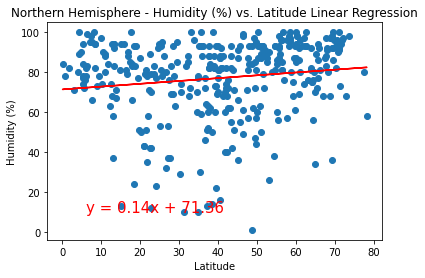

In [18]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04324178497040121


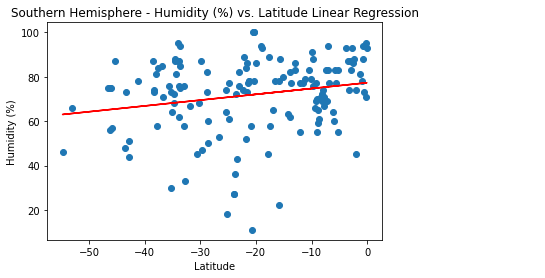

In [19]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.059787867495378635


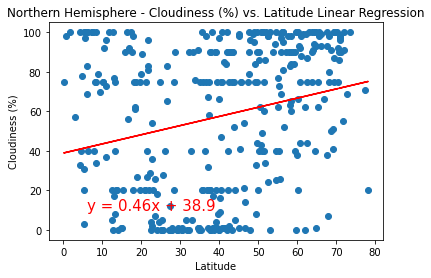

In [20]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.048051467879779854


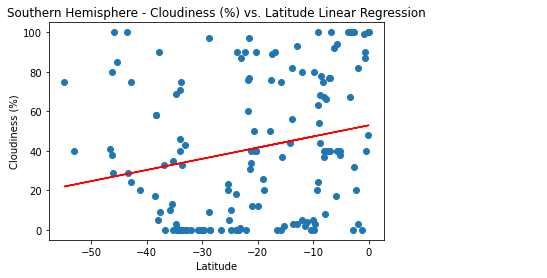

In [21]:

x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')


print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01680407366430621


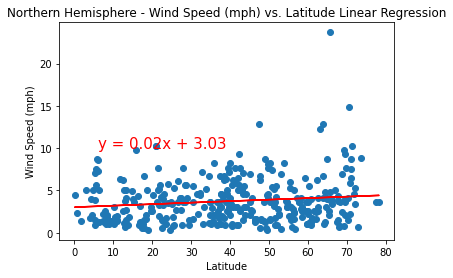

In [22]:
x_values = north_hemisphere["Latitude"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07746632929893092


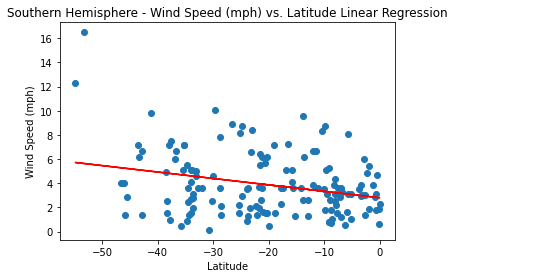

In [23]:
x_values = south_hemisphere["Latitude"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
plt.show()